# Load dataset
- The dataset should inherently include a column named "SMILES," and it must contain a single target column for prediction. If the column name containing the SMILES format is different, please assign the name of that column to the "smiles_col" argument.

In [1]:
from datasets import load_dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = load_dataset("danielpark/smiles_plc50", "csv")
df = pd.DataFrame(dataset['train'])

Found cached dataset csv (C:/Users/parkm/.cache/huggingface/datasets/danielpark___csv/danielpark--smiles_plc50-1104076325aee32e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
df.head()

,SMILES,pIC50,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,25,4.1591
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,36,3.6743
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,23,1.5361
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,22,0.9510
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,21,3.2130


# Scatter plot
- Using the original DataFrame as input, we visualize the distribution of numeric columns as scatter plots.

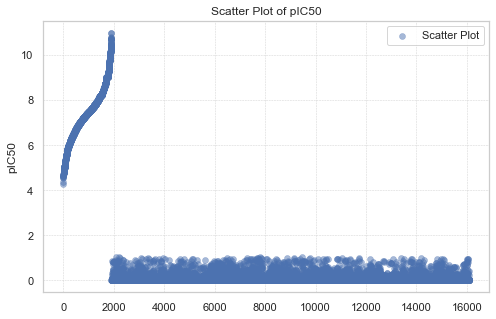

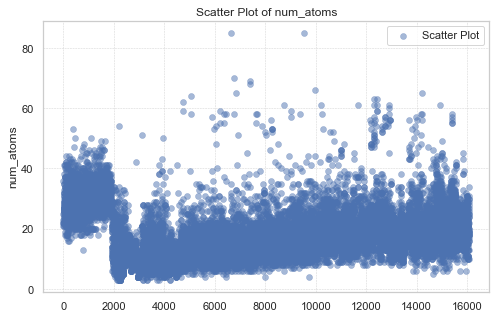

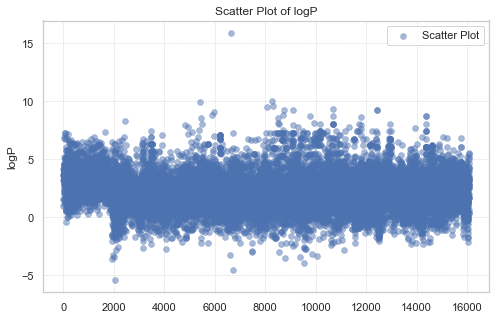

In [3]:
from smilesfeaturizer import df_scatter_plot

df_scatter_plot(df)

# Feature generation
- Create fingerprint columns for SMILES representations based on various packages like RDKit, Mol2Vec, DataMol, MolFeat, sklearn, etc.
- Generate various derived variables to enable ML expansion.
- By default, it uses the 'simple' method, but if you provide the 'specific' argument, it creates various functions based on MACCS, FPVec, ECFP, and RDKit 2D descriptors, represented with suffixes like 'ecfp_'.
- You can vectorize the given SMILES string based on various derived variables, and they are created as columns with one-hot encoding for ML suitability.

In [4]:
df = df
print(len(df.columns))
df.head()

4


,SMILES,pIC50,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,25,4.1591
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,36,3.6743
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,23,1.5361
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,22,0.9510
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,21,3.2130


In [5]:
from smilesfeaturizer import generate_smiles_feature

df = generate_smiles_feature(df) # default method="simple"
print(len(df.columns))
df.head()

[19:03:09] UFFTYPER: Unrecognized atom type: S_5+6 (16)
[19:04:11] UFFTYPER: Unrecognized atom type: S_5+6 (5)
[19:04:25] UFFTYPER: Unrecognized charge state for atom: 1
[19:04:37] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[19:04:37] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[19:04:37] UFFTYPER: Unrecognized atom type: Se2+2 (5)
[19:05:14] UFFTYPER: Unrecognized charge state for atom: 1
[19:05:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[19:05:55] UFFTYPER: Unrecognized atom type: Se2+2 (3)
[19:08:43] UFFTYPER: Unrecognized atom type: S_6+6 (10)


Error occurred for row with col_name '3D_Coordinates' and values: ['c1cc2ccc1CCc1ccc(cc1)CC2' 0.0 16 3.5704
Error occurred for row with col_name '3D_Coordinates' and values: ['CC(C)(C)c1cc(CCC(=O)OCC(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)cc(C(C)(C)C)c1O'
 0.0 85 15.8792 <rdkit.Chem.rdchem.Mol object at 0x000001EF2A423660>]
Error occurred for row with col_name '3D_Coordinates' and values: ['CNC(=S)NCCCCC(NC(=O)C(CC(=O)N1CCOCC1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1'
 0.0 59 2.651 <rdkit.Chem.rdchem.Mol object at 0x000001EF2B479C80>]
Error occurred for row with col_name '3D_Coordinates' and values: ['CNC(=S)NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1'
 0.0 61 5.0212 <rdkit.Chem.rdchem.Mol object at 0x000001EF2B479CF0>]
Error occurred for row with col_name '3D_Coordinates' and values: ['CN(Cc1ccccc1)C(=O)C(Cc1ccccc1)NC(=O)C(Cc1cn(C(=O)OCc2ccccc

,SMILES,pIC50,num_atoms,logP,Molecule,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,fingerprint,3D_Coordinates,...,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,25,4.1591,<rdkit.Chem.rdchem.Mol object at 0x000001EF2A2...,5,1,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[[4.730235378736627, -2.2900782673137003, 0.87...",...,2.094806,0,0,0,2,2,4,0,0,0
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,36,3.6743,<rdkit.Chem.rdchem.Mol object at 0x000001EF2A2...,6,4,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-7.812823742577332, 1.3125311786725888, -1.5...",...,2.997579,0,0,0,2,3,5,0,0,0
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,23,1.5361,<rdkit.Chem.rdchem.Mol object at 0x000001EF2A2...,5,3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[5.097475154956845, -3.253216926634456, -0.29...",...,2.371007,1,0,1,1,1,2,1,0,1
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,22,0.9510,<rdkit.Chem.rdchem.Mol object at 0x000001EF2A2...,5,3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.20254311988543564, 5.183874190897031, -1.5...",...,2.420424,0,1,1,1,1,2,0,1,1
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,21,3.2130,<rdkit.Chem.rdchem.Mol object at 0x000001EF2A2...,3,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[5.810450509795463, 1.2264139383016035, 0.126...",...,2.020784,0,0,0,2,1,3,0,0,0


In [6]:
df = generate_smiles_feature(df, method="specific")
print(len(df.columns))
df.head()

[19:14:37] UFFTYPER: Unrecognized atom type: S_5+6 (16)
[19:15:40] UFFTYPER: Unrecognized atom type: S_5+6 (5)
[19:15:54] UFFTYPER: Unrecognized charge state for atom: 1
[19:16:07] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[19:16:07] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[19:16:07] UFFTYPER: Unrecognized atom type: Se2+2 (5)
[19:16:42] UFFTYPER: Unrecognized charge state for atom: 1
[19:16:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[19:17:20] UFFTYPER: Unrecognized atom type: Se2+2 (3)
[19:20:00] UFFTYPER: Unrecognized atom type: S_6+6 (10)


Error occurred for row with col_name '3D_Coordinates' and values: ['c1cc2ccc1CCc1ccc(cc1)CC2' 0.0 16 3.5704
Error occurred for row with col_name '3D_Coordinates' and values: ['CC(C)(C)c1cc(CCC(=O)OCC(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)(COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)COC(=O)CCc2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)cc(C(C)(C)C)c1O'
 0.0 85 15.8792 <rdkit.Chem.rdchem.Mol object at 0x000001EF2CB57F20>]
Error occurred for row with col_name '3D_Coordinates' and values: ['CCOC(=O)OCCC(SC(=O)OCC)=C(C)N(C=O)CC1=C(C(=O)OCOC(=O)C(C)(C)C)N2C(=O)C(NC(=O)C(=NOC)c3csc(N)n3)C2SC1'
 0.0 54 2.9626 <rdkit.Chem.rdchem.Mol object at 0x000001EF2CF5A900>]
Error occurred for row with col_name '3D_Coordinates' and values: ['CNC(=S)NCCCCC(NC(=O)C(CC(=O)N1CCOCC1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1'
 0.0 59 2.651 <rdkit.Chem.rdchem.Mol object at 0x000001EF2CF54580>]
Error occurred for row with col_name '3D_Coordinates' and values: ['N=C(NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)

[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing Normalizer
[19:25:17] Running Normalizer
[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing Normalizer
[19:25:17] Running Normalizer
[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing Normalizer
[19:25:17] Running Normalizer
[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing Normalizer
[19:25:17] Running Normalizer
[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing Normalizer
[19:25:17] Running Normalizer
[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing Normalizer
[19:25:17] Running Normalizer
[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing Normalizer
[19:25:17] Running Normalizer
[19:25:17] WARNING: not removing hydrogen atom without neighbors
[19:25:17] Initializing N

2703


,SMILES,pIC50,num_atoms,logP,Molecule,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,fingerprint,3D_Coordinates,...,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,25,4.1591,<rdkit.Chem.rdchem.Mol object at 0x000001F07BC...,5,1,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[[5.352519047889793, -2.327646978851583, 0.911...",...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,36,3.6743,<rdkit.Chem.rdchem.Mol object at 0x000001F07BC...,6,4,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-7.493240374337505, -2.621270788357041, -1.8...",...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,23,1.5361,<rdkit.Chem.rdchem.Mol object at 0x000001F07BC...,5,3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-3.8019566521421293, 4.848356226440655, -0.6...",...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,22,0.9510,<rdkit.Chem.rdchem.Mol object at 0x000001F07BC...,5,3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.76228401304766, 4.4744456468242655, -1.29...",...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,21,3.2130,<rdkit.Chem.rdchem.Mol object at 0x000001F07BC...,3,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6.414785338826418, 1.5608223651296824, -1.17...",...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [13]:
df.to_csv("featurized_smiles_plc50.csv")

# Correlation heatmap
- Using derived variables generated based on the SMILES notation, we compare three correlation scores and visualize the top 10 highly correlated features.
- Similar to methodologies for calculating ELI5, SHAP values, or feature importance, this approach allows for a quick and straightforward assessment of multicollinearity and correlation from a data perspective.

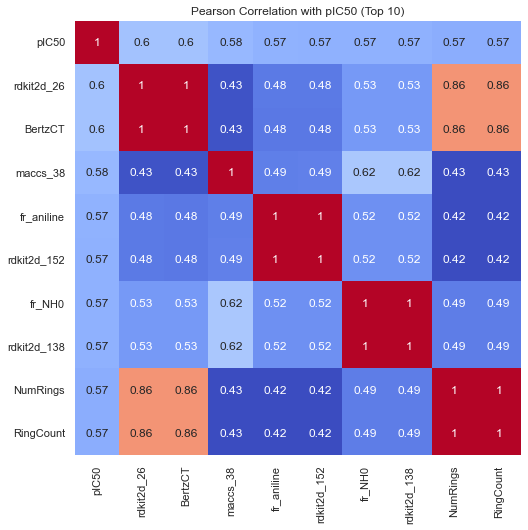

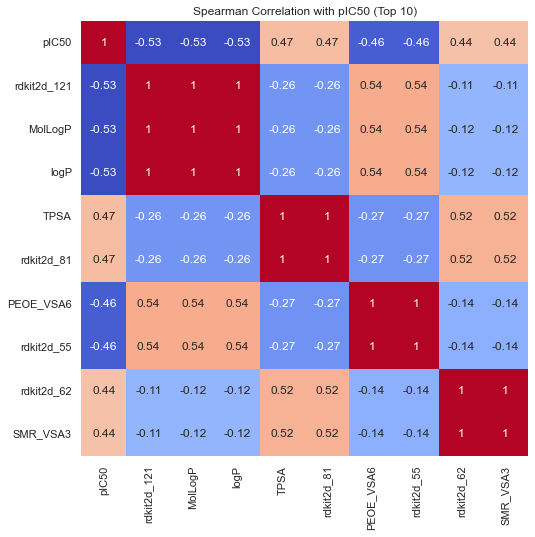

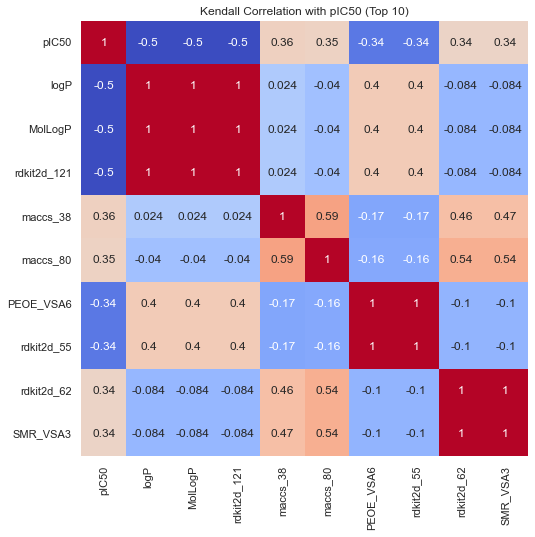

In [7]:
from smilesfeaturizer import draw_corr

draw_corr(df, "pIC50")

# Train machine learning model
- The utility of this package lies in providing fingerprints of SMILES strings with various derived variables, assisting in insights into researchers' datasets. 
- Therefore, it primarily examines very simple LGBM models. This process serves as a way to check for limitations, given that many tasks are insufficient and have discrete outcomes and data. 
- It can also be used as a supplementary tool for reviewing dashboards later.

The target column consists of continuous values, so we should use a regressor.
MSE on test set: 0.19


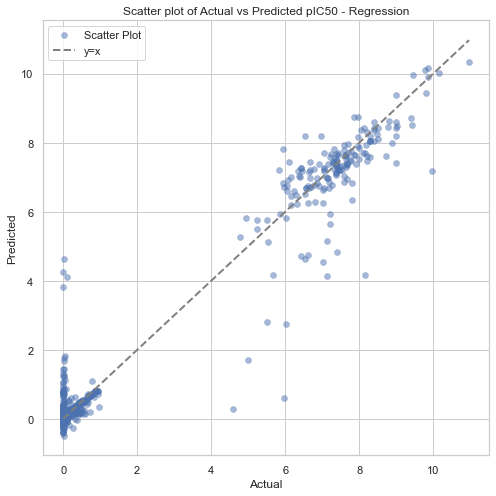

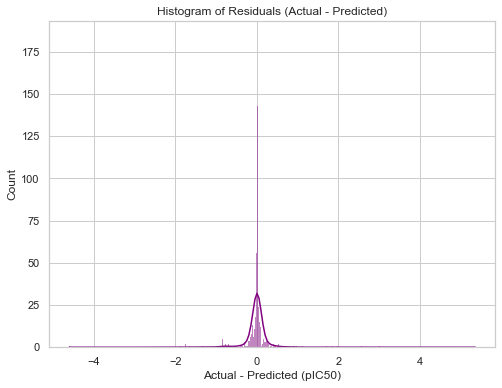

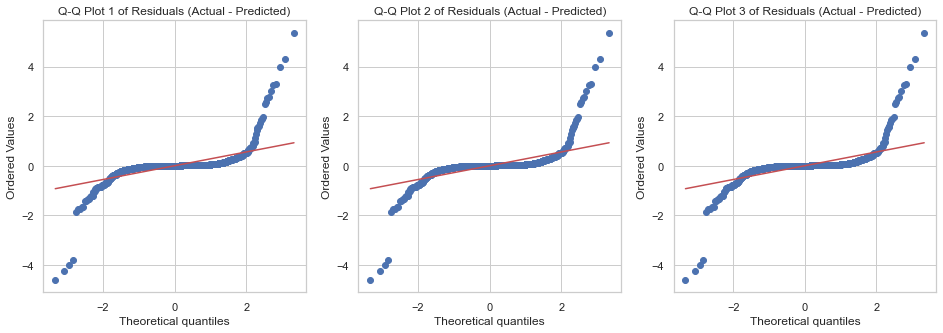

In [8]:
from smilesfeaturizer import train_lgbm

model, x_columns = train_lgbm(df, "pIC50")

In [9]:
df['predicted_pIC50'] = model.predict(df[x_columns])

# Create dashboard 
- Through the dashboard, you can determine which compounds exhibit what prediction performance. 
- Researchers with domain knowledge can assess the prediction performance for specific molecules, identifying both good and poor performers, which can guide further modeling research.

In [10]:
from smilesfeaturizer import create_inline_dash_dashboard

# Load your DataFrame and specify the columns
true_col = 'pIC50'
predicted_col = 'predicted_pIC50'

# Create and run the Dash dashboard
create_inline_dash_dashboard(df, true_col, predicted_col)


# Save reporting images

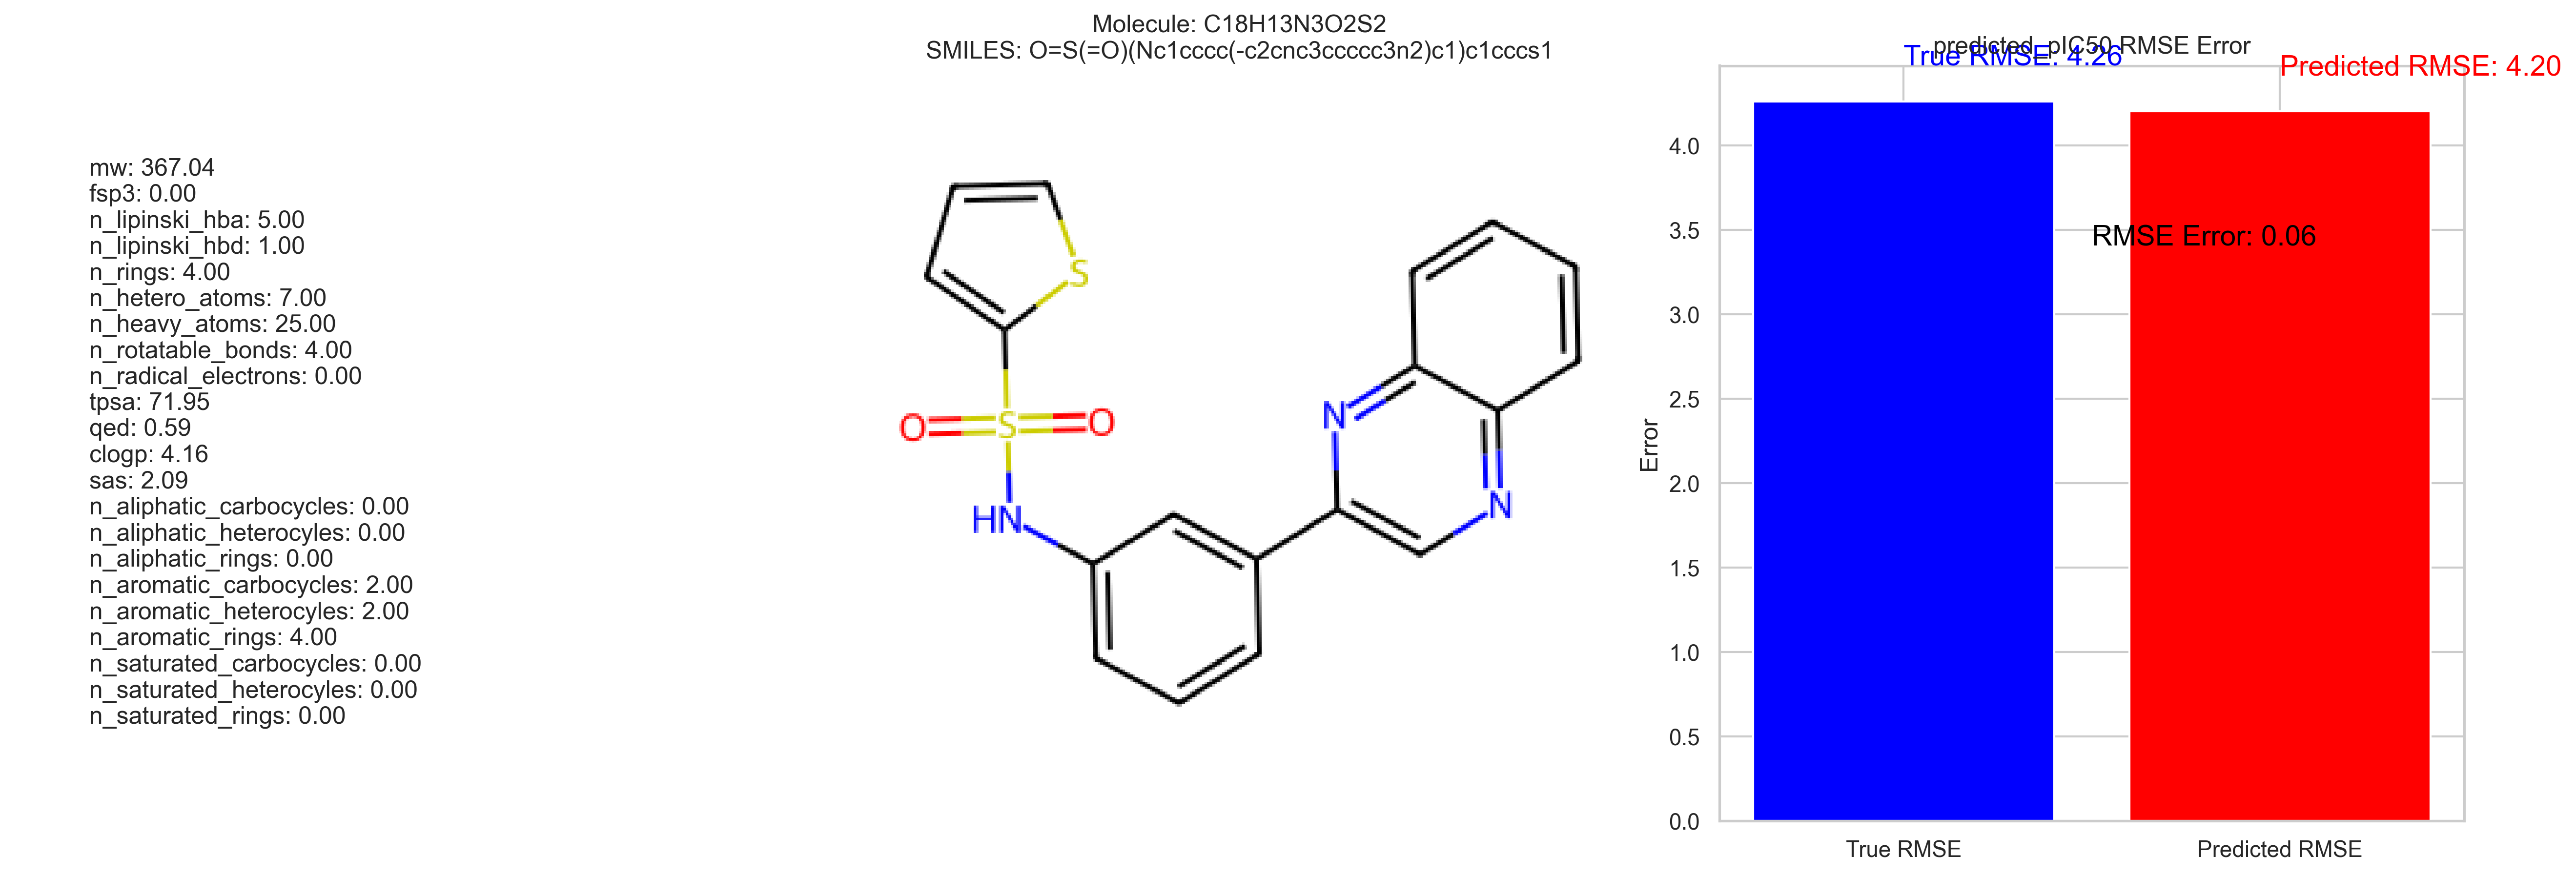

<Figure size 432x288 with 0 Axes>

In [11]:
from smilesfeaturizer import smiles_insight_plot

selected_metric = 'RMSE'  # Choose the error metric you want to display
true_column = 'pIC50'  # Replace with your true column name
predicted_column = 'predicted_pIC50'  # Replace with your predicted column name
smiles_insight_plot(df[:1], true_column, predicted_column, selected_metric, 'output_folder', show=True)